# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1309]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


###  Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [1310]:
covid19db =pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
covid19db

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Let's check the shape of the dataframe

In [1311]:
covid19db.shape

(266, 104)

###  Delete the useless columns

In [1312]:
covid19db.drop("Province/State",axis=1,inplace=True)
covid19db

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Aggregating the rows by the country

In [1313]:
group_by_frame=covid19db.groupby('Country/Region').sum()

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

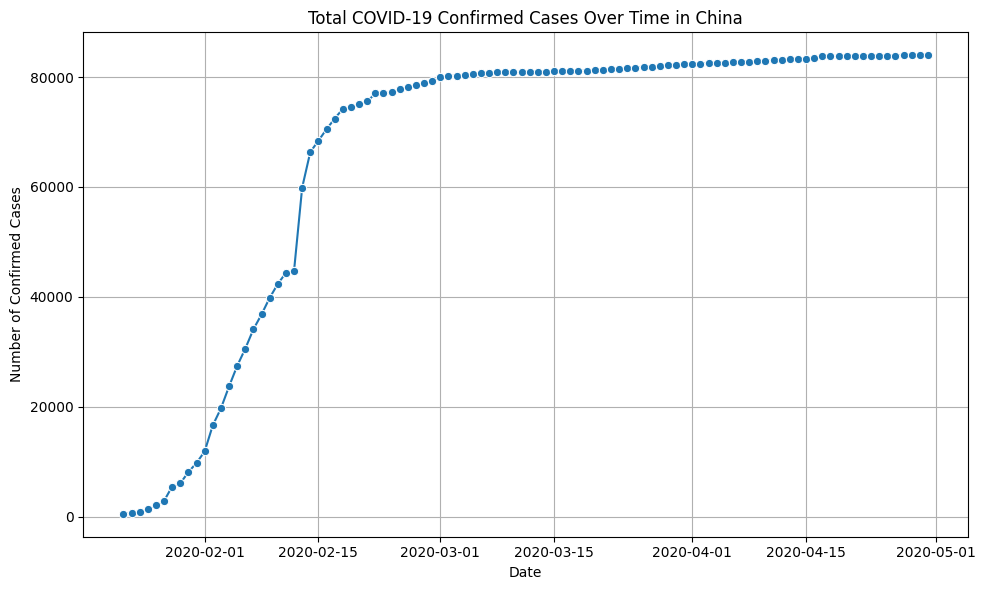

In [1314]:
# Transpose the DataFrame to get dates as rows and countries as columns
china_data = group_by_frame.T
# Extract the data for China
china_data = china_data[['China']].reset_index()
china_data.columns = ['Date', 'Confirmed Cases']
# Convert 'Date' to datetime with an explicit format
china_data['Date'] = pd.to_datetime(china_data['Date'], format='%m/%d/%y', errors='coerce')
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=china_data, x='Date', y='Confirmed Cases', marker='o')
plt.title('Total COVID-19 Confirmed Cases Over Time in China')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<Axes: >

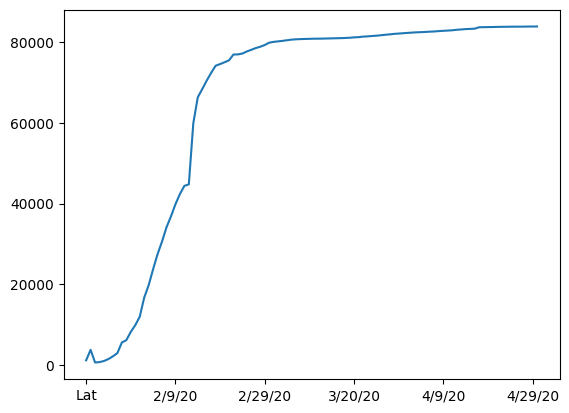

In [1315]:
covid_data_aggregated = covid19db.groupby('Country/Region').sum()
covid_data_aggregated.loc['China'].plot()

### Find maximum infection rate for all of the countries.

In [1316]:
# Aggregate the data by country/region
covid_data_aggregated = covid19db.groupby('Country/Region').sum()
# Calculate the maximum infection rate for each country
covid_data_aggregated['Max Infection Rate'] = covid_data_aggregated.max(axis=1)
# Display the resulting dataframe
covid_data_aggregated[['Max Infection Rate']]

,Max Infection Rate
Country/Region,
Afghanistan,2171.000000
Albania,773.000000
Algeria,4006.000000
Andorra,745.000000
Angola,27.000000
...,...
West Bank and Gaza,484.000000
Western Sahara,24.215500
Yemen,48.516388


### create a new dataframe with only needed column 
 max_infection_rate is the needed column

In [1317]:
dataframe=covid_data_aggregated[['Max Infection Rate']]
dataframe

,Max Infection Rate
Country/Region,
Afghanistan,2171.000000
Albania,773.000000
Algeria,4006.000000
Andorra,745.000000
Angola,27.000000
...,...
West Bank and Gaza,484.000000
Western Sahara,24.215500
Yemen,48.516388


###  
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the dataset

In [1318]:
happiness =pd.read_csv(r"Datasets\worldwide_happiness_report.csv")
happiness

,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### let's drop the useless columns 

In [1319]:
happiness.drop("Score",axis=1,inplace=True)
happiness

,Overall rank,Country/Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035


### Now let's join two dataset we have prepared  

#### Corona Dataset :

In [1320]:
dataframe

,Max Infection Rate
Country/Region,
Afghanistan,2171.000000
Albania,773.000000
Algeria,4006.000000
Andorra,745.000000
Angola,27.000000
...,...
West Bank and Gaza,484.000000
Western Sahara,24.215500
Yemen,48.516388


#### world happiness report Dataset :

In [1321]:
happiness

,Overall rank,Country/Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035


In [1322]:
result_outer = pd.merge(happiness, dataframe, on='Country/Region', how='inner')
print("Outer Join:\n", result_outer)

Outer Join:
      Overall rank            Country/Region  GDP per capita  Social support  \
0               1                   Finland           1.340           1.587   
1               2                   Denmark           1.383           1.573   
2               3                    Norway           1.488           1.582   
3               4                   Iceland           1.380           1.624   
4               5               Netherlands           1.396           1.522   
..            ...                       ...             ...             ...   
138           152                    Rwanda           0.359           0.711   
139           153                  Tanzania           0.476           0.885   
140           154               Afghanistan           0.350           0.517   
141           155  Central African Republic           0.026           0.000   
142           156               South Sudan           0.306           0.575   

     Healthy life expectancy  Freedom 

### correlation matrix 

In [1323]:
numeric_result_outer = result_outer.select_dtypes(include='number')
correlation_matrix = numeric_result_outer.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                               Overall rank  GDP per capita  Social support  \
Overall rank                      1.000000       -0.802204       -0.780955   
GDP per capita                   -0.802204        1.000000        0.759468   
Social support                   -0.780955        0.759468        1.000000   
Healthy life expectancy          -0.804753        0.863062        0.765286   
Freedom to make life choices     -0.570490        0.394603        0.456246   
Generosity                       -0.063107       -0.103870       -0.061361   
Perceptions of corruption        -0.389360        0.311577        0.203225   
Max Infection Rate               -0.301844        0.328947        0.241535   

                              Healthy life expectancy  \
Overall rank                                -0.804753   
GDP per capita                               0.863062   
Social support                               0.765286   
Healthy life expectancy                      1.0

### Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

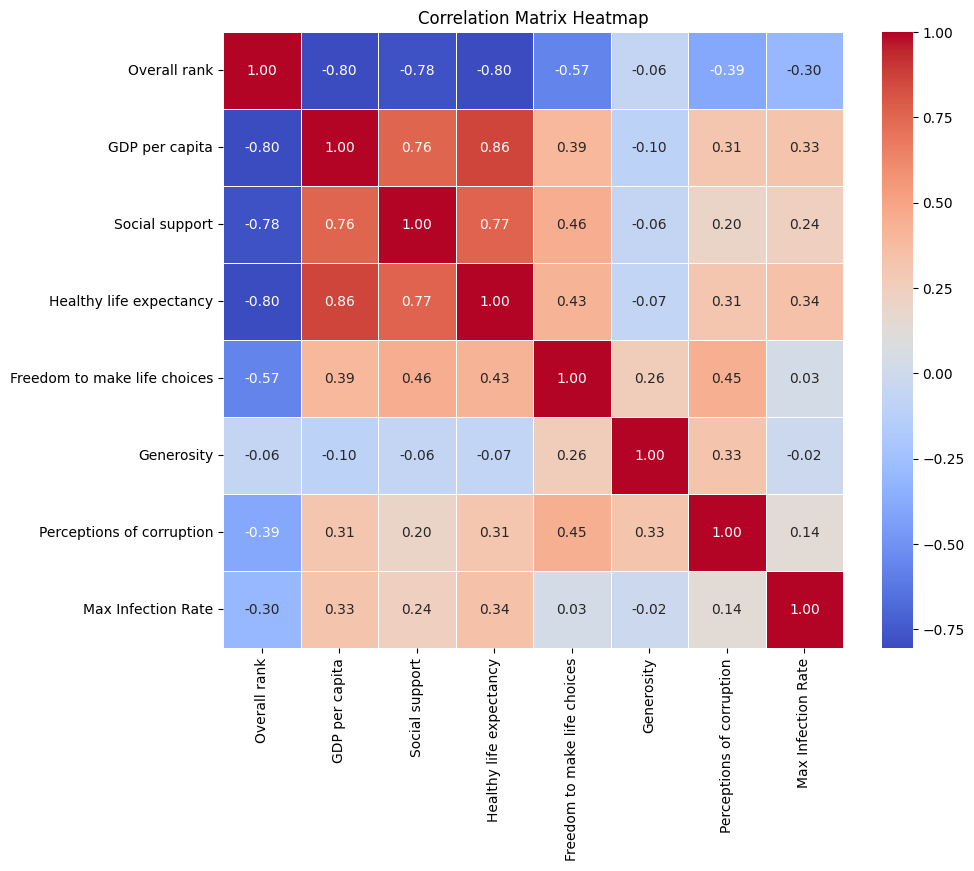

In [1324]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Plotting GDP vs maximum Infection rate

<Axes: xlabel='GDP per capita', ylabel='Max Infection Rate'>

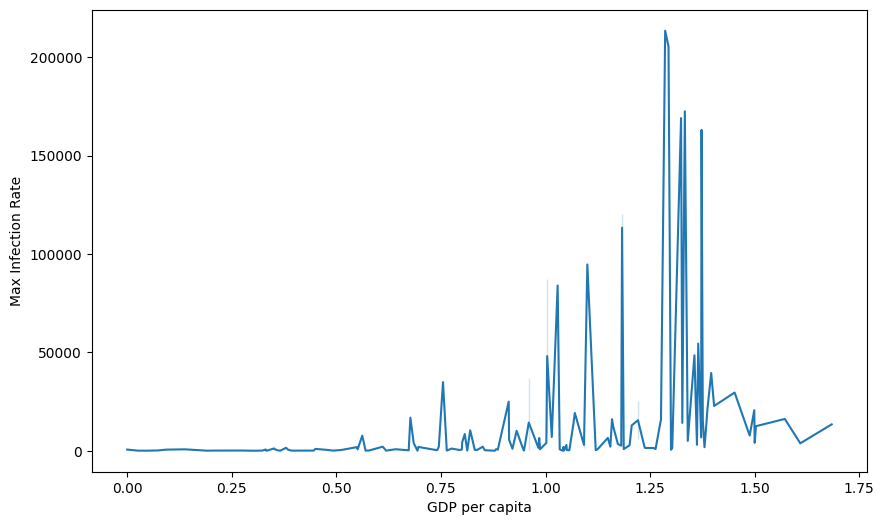

In [1325]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='GDP per capita', y='Max Infection Rate', data=result_outer)

### Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='Max Infection Rate'>

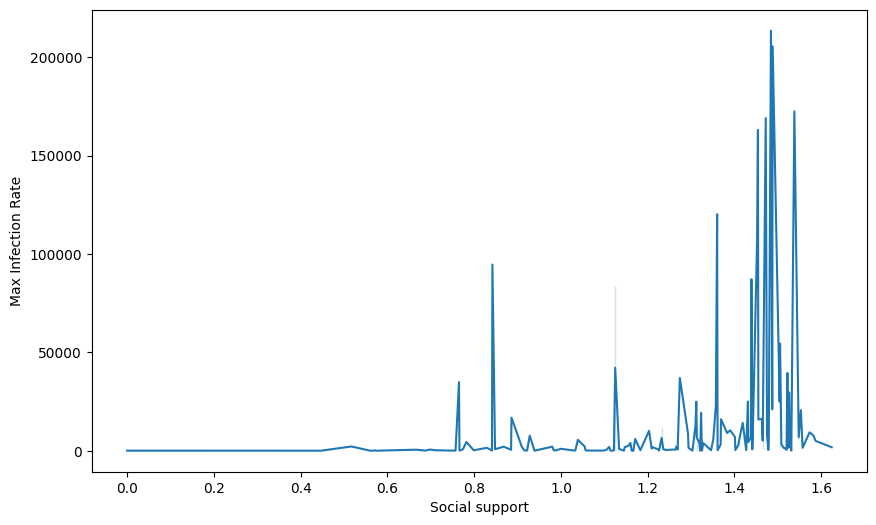

In [1326]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Social support', y='Max Infection Rate', data=result_outer)

### Plotting Healthy life expectancy vs maximum Infection rate

<Axes: xlabel='Healthy life expectancy', ylabel='Max Infection Rate'>

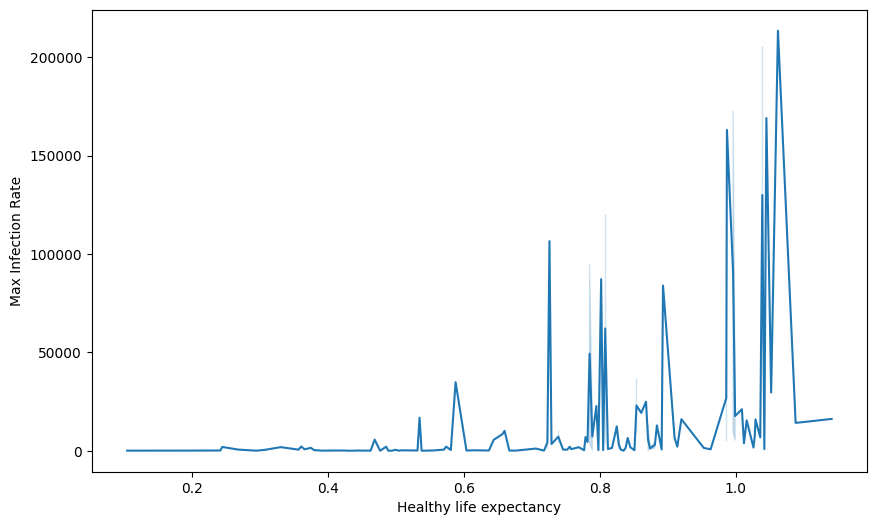

In [1327]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Healthy life expectancy', y='Max Infection Rate', data=result_outer)

### Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='Max Infection Rate'>

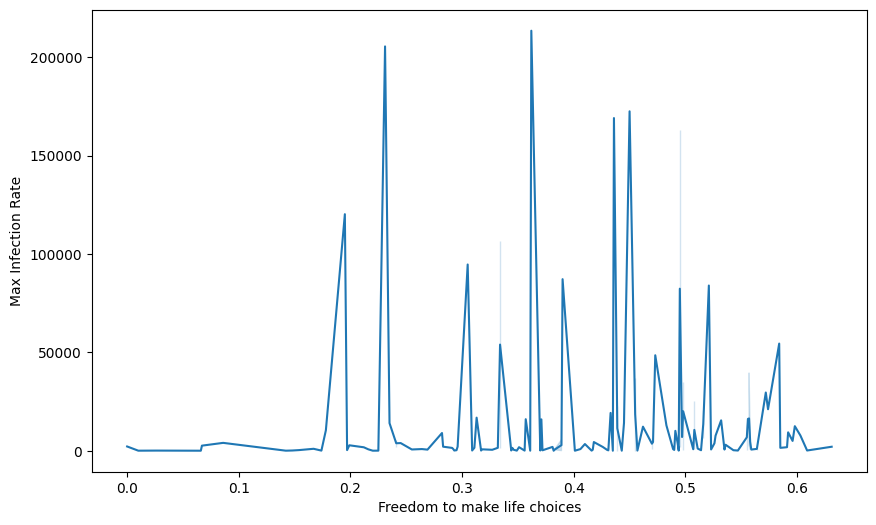

In [1328]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Freedom to make life choices', y='Max Infection Rate', data=result_outer)